# House Price Prediction

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load Train Dataset

In [2]:
dataset = pd.read_csv(r"E:\DEEP LEARNING\Projects\House Price Predictions\train.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Load Test Dataset

In [3]:
test_data = pd.read_csv(r"E:\DEEP LEARNING\Projects\House Price Predictions\test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
test_data.shape

(1459, 80)

### Handling not available data

#### LotFrontage is to be filled with mean
#### Alley ,  BsmtQual , BsmtCond , BsmtExposure , BsmtFinType1 , BsmtFinType2 , FireplaceQu ,  GarageType , GarageYrBlt , GarageFinish ,  GarageQual , GarageCond , PoolQC , Fence are to be filled with 'Not Available'

#### Drop 'MasVnrType' ,  'MasVnrArea' , 'MiscFeature' , 'Electrical'  value columns
 

### Assign Predictors and Targets

In [5]:
X = dataset.drop(labels = ['SalePrice', 'Id'], axis = 1)
y = dataset['SalePrice']

In [6]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### Handle Missing Data on train dataset

In [7]:
X['LotFrontage'].fillna(value = X['LotFrontage'].mean(), inplace=True)
X['BsmtQual'].fillna(value = 'Not Available', inplace=True)
X['BsmtCond'].fillna(value = 'Not Available', inplace=True)
X['BsmtExposure'].fillna(value = 'Not Available', inplace=True)
X['BsmtFinType1'].fillna(value = 'Not Available', inplace=True)
X['BsmtFinType2'].fillna(value = 'Not Available', inplace=True)
X['GarageType'].fillna(value = 'Not Available', inplace=True)
X['GarageYrBlt'].fillna(value = 'Not Available', inplace=True)
X['GarageFinish'].fillna(value = 'Not Available', inplace=True)
X['GarageQual'].fillna(value = 'Not Available', inplace=True)
X['GarageCond'].fillna(value = 'Not Available', inplace=True)
X['PoolQC'].fillna(value = 'Not Available', inplace=True)

In [8]:
X[X.columns[X.isnull().any()]].isnull().sum()

Alley          1369
MasVnrType        8
MasVnrArea        8
Electrical        1
FireplaceQu     690
Fence          1179
MiscFeature    1406
dtype: int64

#### Drop MSSubclass, LotFrontage, LotArea,  Alley, LotShape, LandContour, LotConfig, Condition1, Condition2, 'RoofStyle' ,RoofMatl', 'Exterior1st', 'Exterior2nd', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',  'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageArea','WoodDeckSF', 'OpenPorchSF',  'EnclosedPorch', '3SsnPorch', 'ScreenPorch',PoolArea, 'Fence', 'MiscVal','SaleType', 'SaleCondition', 'MasVnrType' , 'MasVnrArea' , 'MiscFeature' , 'Electrical'

In [9]:
X_cleaned = X.drop(labels = ['MSSubClass', 'LotFrontage', 'LotArea', 'Alley', 'LotShape', 'LandContour',
                                           'LotConfig', 'Condition1', 'Condition2', 'RoofStyle' ,'RoofMatl', 'Exterior1st',
                                           'Exterior2nd', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 
                                           'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                                           'BedroomAbvGr', 'KitchenAbvGr','Fireplaces', 'FireplaceQu', 'GarageYrBlt',
                                           'GarageFinish', 'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                                           '3SsnPorch', 'ScreenPorch','PoolArea', 'Fence', 'MiscVal','SaleType',
                                           'SaleCondition', 'MasVnrType' , 'MasVnrArea' , 'MiscFeature' , 'Electrical'], axis = 1)

In [10]:
X_cleaned.columns

Index(['MSZoning', 'Street', 'Utilities', 'LandSlope', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'GarageType', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'MoSold', 'YrSold'],
      dtype='object')

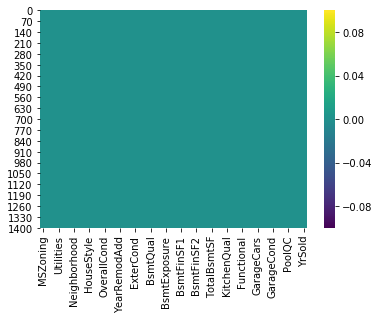

In [11]:
sns.heatmap(X_cleaned.isnull(), cmap='viridis')

In [12]:
X_cleaned.shape

(1460, 35)

### Handling Missing Data on Test Dataset

In [13]:
Y = test_data.drop(labels = ['Id','MSSubClass', 'LotFrontage', 'LotArea', 'Alley', 'LotShape', 'LandContour',
                                           'LotConfig', 'Condition1', 'Condition2', 'RoofStyle' ,'RoofMatl', 'Exterior1st',
                                           'Exterior2nd', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 
                                           'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                                           'BedroomAbvGr', 'KitchenAbvGr','Fireplaces', 'FireplaceQu', 'GarageYrBlt',
                                           'GarageFinish', 'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                                           '3SsnPorch', 'ScreenPorch','PoolArea', 'Fence', 'MiscVal','SaleType',
                                           'SaleCondition', 'MasVnrType' , 'MasVnrArea' , 'MiscFeature' , 'Electrical'], axis = 1)

In [14]:
Y.head()

,MSZoning,Street,Utilities,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,TotRmsAbvGrd,Functional,GarageType,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,MoSold,YrSold
0,RH,Pave,AllPub,Gtl,NAmes,1Fam,1Story,5,6,1961,...,5,Typ,Attchd,1.0,TA,TA,Y,NaN,6,2010
1,RL,Pave,AllPub,Gtl,NAmes,1Fam,1Story,6,6,1958,...,6,Typ,Attchd,1.0,TA,TA,Y,NaN,6,2010
2,RL,Pave,AllPub,Gtl,Gilbert,1Fam,2Story,5,5,1997,...,6,Typ,Attchd,2.0,TA,TA,Y,NaN,3,2010
3,RL,Pave,AllPub,Gtl,Gilbert,1Fam,2Story,6,6,1998,...,7,Typ,Attchd,2.0,TA,TA,Y,NaN,6,2010
4,RL,Pave,AllPub,Gtl,StoneBr,TwnhsE,1Story,8,5,1992,...,5,Typ,Attchd,2.0,TA,TA,Y,NaN,1,2010


In [15]:
Y[Y.columns[Y.isnull().any()]].isnull().sum()

MSZoning           4
Utilities          2
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
KitchenQual        1
Functional         2
GarageType        76
GarageCars         1
GarageQual        78
GarageCond        78
PoolQC          1456
dtype: int64

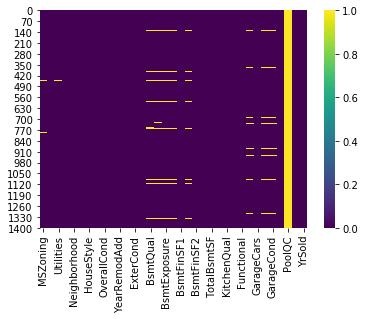

In [16]:
sns.heatmap(Y.isnull(), cmap='viridis')

In [17]:
Y['MSZoning'].fillna(value = Y['MSZoning'].mode()[0], inplace=True)
Y['Utilities'].fillna(value = Y['Utilities'].mode()[0], inplace=True)
Y['BsmtQual'].fillna(value = 'Not Available', inplace=True)
Y['BsmtCond'].fillna(value = 'Not Available', inplace=True)
Y['BsmtExposure'].fillna(value = 'Not Available', inplace=True)
Y['BsmtFinType1'].fillna(value = 'Not Available', inplace=True)
Y['BsmtFinSF1'].fillna(value = Y['BsmtFinSF1'].mean(), inplace=True)
Y['BsmtFinType2'].fillna(value = 'Not Available', inplace=True)
Y['BsmtFinSF2'].fillna(value = Y['BsmtFinSF2'].mean(), inplace=True)
Y['BsmtUnfSF'].fillna(value = Y['BsmtUnfSF'].mean(), inplace=True)
Y['TotalBsmtSF'].fillna(value = Y['TotalBsmtSF'].mean(), inplace=True)
Y['KitchenQual'].fillna(value = Y['KitchenQual'].mode()[0], inplace=True)
Y['Functional'].fillna(value = Y['Functional'].mode()[0], inplace=True)
Y['GarageType'].fillna(value = 'Not Available', inplace=True)
Y['GarageCars'].fillna(value = Y['GarageCars'].mean(), inplace=True)
Y['GarageQual'].fillna(value = 'Not Available', inplace=True)
Y['GarageCond'].fillna(value = 'Not Available', inplace=True)
Y['PoolQC'].fillna(value = 'Not Available', inplace=True)

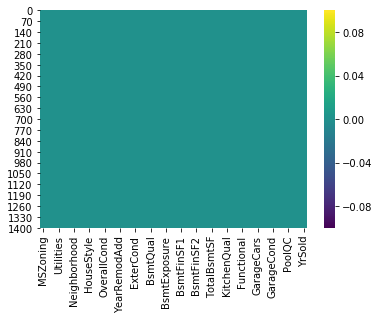

In [18]:
sns.heatmap(Y.isnull(), cmap='viridis')

In [19]:
Y[Y.columns[Y.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [20]:
Y.columns

Index(['MSZoning', 'Street', 'Utilities', 'LandSlope', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'GarageType', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'MoSold', 'YrSold'],
      dtype='object')

In [21]:
#Concatenate both dataset row wise to create dummy variables
combined_df = pd.concat([X_cleaned, Y], axis=0)
combined_df.head()

,MSZoning,Street,Utilities,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,TotRmsAbvGrd,Functional,GarageType,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,MoSold,YrSold
0,RL,Pave,AllPub,Gtl,CollgCr,1Fam,2Story,7,5,2003,...,8,Typ,Attchd,2.0,TA,TA,Y,Not Available,2,2008
1,RL,Pave,AllPub,Gtl,Veenker,1Fam,1Story,6,8,1976,...,6,Typ,Attchd,2.0,TA,TA,Y,Not Available,5,2007
2,RL,Pave,AllPub,Gtl,CollgCr,1Fam,2Story,7,5,2001,...,6,Typ,Attchd,2.0,TA,TA,Y,Not Available,9,2008
3,RL,Pave,AllPub,Gtl,Crawfor,1Fam,2Story,7,5,1915,...,7,Typ,Detchd,3.0,TA,TA,Y,Not Available,2,2006
4,RL,Pave,AllPub,Gtl,NoRidge,1Fam,2Story,8,5,2000,...,9,Typ,Attchd,3.0,TA,TA,Y,Not Available,12,2008


In [22]:
combined_df.shape

(2919, 35)

In [23]:
combined_df = pd.get_dummies(combined_df, drop_first=True, columns=['MSZoning', 'Street', 'Utilities', 'LandSlope', 'Neighborhood',
                                                                'BldgType', 'HouseStyle', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                                                                'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',
                                                                'Functional','KitchenQual', 'GarageType', 'GarageQual',
                                                               'GarageCond', 'PavedDrive', 'PoolQC'])

In [24]:
combined_df.shape

(2919, 122)

In [25]:
#to check any duplicated columns are created
combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]

In [26]:
X_cleaned = combined_df.iloc[:1460,:]
Y_encoded = combined_df.iloc[1460:,:]

In [27]:
X_cleaned.shape

(1460, 122)

In [28]:
Y_encoded.shape

(1459, 122)

In [29]:
y_cleaned = y

In [30]:
y_cleaned

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

### Split data into Training and Dev set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=.20, random_state = 0)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
Y_encoded = scaler.transform(Y_encoded)

### RidgeCV

In [42]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=(0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10))
ridge_cv.fit(X_train, y_train.to_numpy())

RidgeCV(alphas=array([ 0.01,  0.05,  0.1 ,  0.3 ,  1.  ,  3.  ,  5.  , 10.  ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

### Predictions

In [43]:
ridge_cv_preds=ridge_cv.predict(X_test)

In [44]:
ridge_cv_preds

array([267183.05382139, 157371.17628581, 110481.24362302, 217074.30379448,
        95439.40246408,  79264.47705074, 267172.82185896, 122643.26468332,
       504831.46254745, 161691.09802079, 214703.89289219, 154135.5019142 ,
       224629.37368081, 115702.6424132 , 115731.30160944, 145836.37501594,
       258899.1681218 , 130288.64508911, 136248.96949698, 179855.74061407,
       130822.90389474, 154261.21263374, 109453.24573768, 160297.93796586,
       202544.24734336, 179719.08414658, 170075.79619086,  62093.04585196,
       314999.87772167, 113006.67393562, 153532.22025473, 192780.81447987,
       143420.77512202, 302867.98088753, 324569.45403071, 201960.73776769,
       319920.21877763, 133902.12103131, 234037.5156833 , 355820.14448211,
       212756.19296582, 109622.62618955, 193602.64170981, 322395.66807337,
       360051.16042738, 142422.96459281, 119111.28152532, 134010.828809  ,
       166796.89556987, 104763.43130462, 394156.5493948 , 148726.07423927,
       168173.90540603,  

# Predictions on given Test Set

In [45]:
Test_set_predictions = ridge_cv.predict(Y_encoded)

In [46]:
type(Test_set_predictions)

numpy.ndarray

In [47]:
Test_set_predictions

array([102418.87146487, 159355.92796625, 181194.75824732, ...,
       165926.60487961, 120005.69264508, 209550.79447509])

In [48]:
#Create Submission Dataframe
pred = pd.DataFrame(Test_set_predictions)
sub_df = pd.read_csv(r"E:\DEEP LEARNING\Projects\House Price Predictions\sample_submission.csv")
dataset_submit = pd.concat([sub_df['Id'], pred], axis = 1)

In [49]:
dataset_submit.columns = ['Id','SalePrice']
dataset_submit.to_csv('Submission_ridgeCV_standardized.csv',index=False)